In [1]:
import os

os.chdir('E:\Datasets')

## 3. Fake news detection using Pandas and Statsmodels

We use both fake news and real news as training inputs to our TFIDF (Term Frequency and Inverse Document Frequency) features for creating a classifier. Then a regular test set is given as input and the classifier to detect if it is fake news or real news

In [2]:
import pandas as pd

news = pd.read_csv('fakenews.csv')
print( news.shape )
news.head()

(12999, 20)


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [3]:
news.type.value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

Only 19 Fake news rest all are real news of different genre

Highly Imbalanced dataset

In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

In [5]:
news.site_url.value_counts()

politicususa.com         100
ihavethetruth.com        100
trunews.com              100
pravda.ru                100
humansarefree.com        100
                        ... 
vonpress.com               1
allnewspipeline.com        1
defenddemocracy.press      1
globalresearch.ca          1
ufoholic.com               1
Name: site_url, Length: 244, dtype: int64

In [6]:
news.language.value_counts()

english       12403
russian         203
spanish         172
german          111
french           38
arabic           22
portuguese       11
turkish          10
italian           9
ignore            7
greek             4
norwegian         3
dutch             3
polish            1
finnish           1
chinese           1
Name: language, dtype: int64

In [7]:
news.domain_rank.value_counts()

34811.0    100
33221.0    100
30890.0    100
63847.0    100
14170.0    100
          ... 
21114.0      1
16994.0      1
78345.0      1
42575.0      1
49688.0      1
Name: domain_rank, Length: 133, dtype: int64

In [8]:
news.title[0] == news.thread_title[0]

True

In [9]:
print( news.title[1] )
print( news.thread_title[1] )


Re: Why Did Attorney General Loretta Lynch Plead The Fifth?
Re: Why Did Attorney General Loretta Lynch Plead The Fifth?


In [10]:
print( news.text[0],'\n' )
print( news.text[20], '\n' )
print( news.text[200] )

Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? 
Here we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! 
We’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related 

Mark Cuban has made no secret of his dislike for Trump and his love for Crooked Hillary. Watch him tell FOX News’ Neil Cavuto (at 5:38 mark), “If Donald wins, I have no doubt the market tanks!” Well, that’s not exactly what happened now is it Cuban? So here’s what really happened: 
Market Watch – U.S. stocks rallied Wednesday, with the Dow industrials jumping 257 points, led by a surge in financial, health-care and industrial stocks, as investors bet on the infrastructure spending policy

In [11]:
news.ord_in_thread.value_counts()

0     12328
1       113
2        68
3        52
4        39
      ...  
45        1
53        1
61        1
89        1
83        1
Name: ord_in_thread, Length: 100, dtype: int64

Distribution of Features and Label


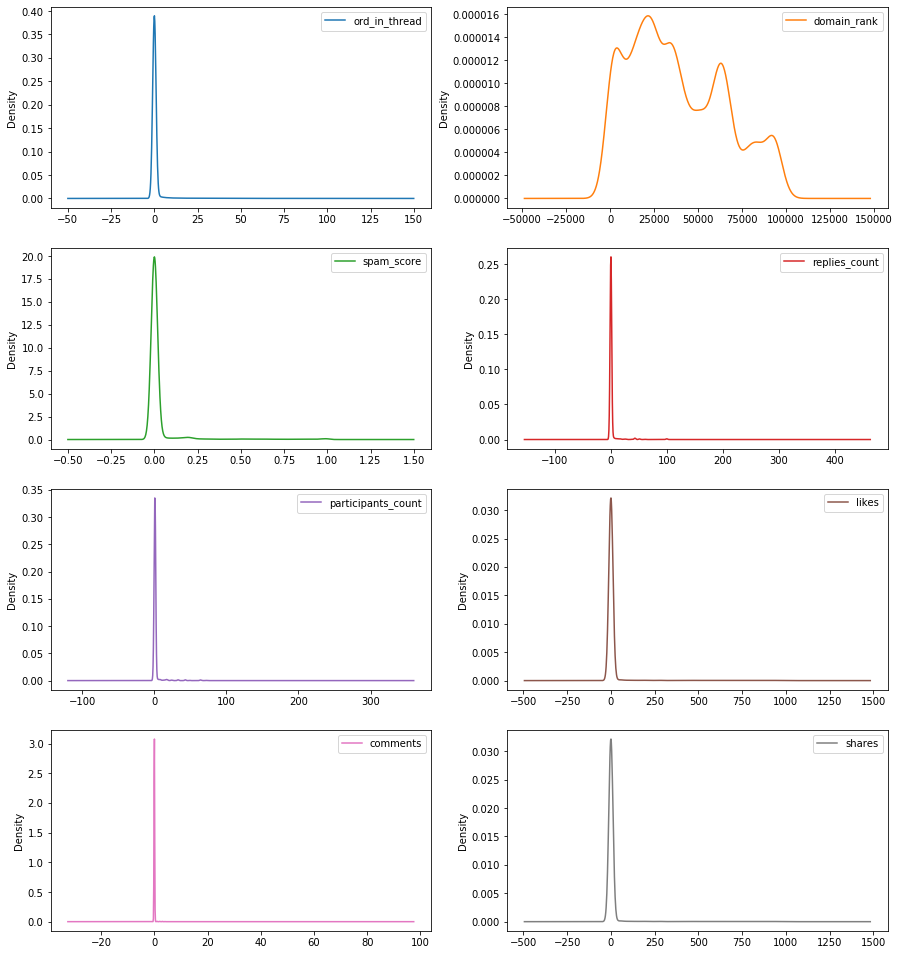

In [12]:
news.plot(kind='density', subplots=True, figsize=(15,17), layout=(4,2), sharex=False, sharey=False)
print('Distribution of Features and Label')

In [13]:
news.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,34478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,60570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


In [14]:
newsEng = news[ news['language'] == 'english'] 
newsEng.shape

(12403, 20)

In [15]:
sdata = newsEng.sort_values('published', axis=0, ascending=True )   # sort_values is present in Pandas

In [16]:
finalData = sdata.drop_duplicates( subset={'author', 'title', 'language', 'country'}, keep='first', inplace=False )

# Here subset: is a subset of cols which are checked for similarty for duplicacy
# keep = first : means keep the first row delete the rest duplicates
# inplace = false : means it will return a copy instead of dropping it inplace
# drop duplicates is present in Pandas

finalData.shape

(11885, 20)

In [17]:
finalData.type.value_counts()

bs            10485
bias            394
conspiracy      377
hate            242
satire          146
state           120
junksci         102
fake             19
Name: type, dtype: int64

In [18]:
type(finalData.text[20])

str

In [19]:
finalData['text'].isna().sum()

46

In [20]:
# Removing all the datapoints that don't have any text

x = finalData[ ~finalData['text'].isna() ]
x.shape

(11839, 20)

In [21]:
x.text.isna().sum()

0

In [22]:
title = ['Unknown' if len(str(item))<1 or type(item)==float else item for item in x.title.values]
title[:10]

['Anonymous – World War 3 is imminent 2016',
 'Is Goat Milk Better Than Cow Milk? Plus A List Of Health Benefits',
 'Unknown',
 'How White Cops Interact with Blacks in Real Life',
 'Unknown',
 'Unknown',
 'Unknown',
 'Latest Pipeline Leak Underscores Dangers Of Dakota Access Pipeline',
 'Unknown',
 'United States – reformation or fracture?, by Thierry Meyssan']

In [23]:
# Does Missing title imply fake news ?

x['title'] = title
temp = x[ x['title'] == 'Unknown' ]
temp.type.value_counts()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


bs            347
bias           82
conspiracy      5
Name: type, dtype: int64

## Text Processing

In [24]:
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [25]:
from nltk.corpus import stopwords 

stop = set( stopwords.words('english') )  
## We created a set called stop for predefined stopwords in stopwords.words('english')

print(stop)

## Use nltk.download() if package not already present

{'does', 'aren', 'you', 'needn', 'them', 'doing', 'after', 'herself', 'through', 'doesn', 'which', 'himself', 'from', 'her', 'hadn', 'she', "should've", 'at', 'between', 'mustn', 'up', "you're", 'yourselves', 'itself', 'were', 'again', 'has', "haven't", 'few', 'these', 'shan', 'it', "mustn't", 'me', "you've", 'can', 'now', 'are', 'when', 'here', 'ain', 'during', "aren't", 'nor', "she's", "you'd", 'while', 'each', 'won', 'have', 'did', 'against', 'mightn', "won't", 'this', 'above', 'out', "shan't", "isn't", "needn't", 'and', "mightn't", 'should', 'of', 'as', 'before', 'where', 'those', 'over', 'whom', 'for', "doesn't", "you'll", 'having', 'do', 'being', "that'll", 'an', "weren't", 'was', "hadn't", 'didn', 'all', 'than', 'm', 'in', 'most', 'by', 'such', 'ourselves', 'is', 'don', 'y', 't', 'why', 'below', 'yours', 'on', 'wouldn', 'theirs', 'but', "couldn't", 'o', 'then', 'other', 'their', 'because', 'not', "wouldn't", 'what', 'into', 'to', 'be', 'wasn', "don't", 'your', 'my', 'same', 'sho

In [26]:
snow = nltk.stem.SnowballStemmer('english')  #Initializing a Snowball Stemmer for English

print(snow)

snow.stem('beautiful')  # Will give the Stem word for Beautiful

'beauti'

In [27]:
import re  # Regular Expression

def html(sen):       # cleans HTML tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sen)
    return cleantext

def punc(sen):      # cleans Punctuations
    clean = re.sub( r'[?|!|\'|"|#]', r'', sen ) # Find ? ! ' " # and remove it with blank from sen
    clean = re.sub( r'[.|,|}|)|(|\|/]', r'', clean )  # Find . , } ) ( \ / ) and remove it from clean
    return clean

# compile() function converts an expression string into a RegexObject
# sub() is used to replace all occurances of a pattern with another string

In [28]:
from tqdm import tqdm # For progressbar   pip install tqdm

def processText(stuff):

    string = ''
    finalstr = []

    for sen in tqdm(stuff.values):    # tqdm only used here to display progressbar for the for loop 
        filter_sen = []
        sen = html(sen) # Removes HTML Tags

        for w in sen.split():
            for cw in punc(w).split():  # removes punc and splits the sentence to words and iterate through the loop

                if cw.isalpha() and len(cw) > 2 :  # Check if word is alphabet and len is > 2
                    if cw.lower() not in stop :  # Check if word is not a stopword 

                        s = snow.stem( cw.lower() ).encode('utf8')  # Coverts the word to it's stem word
                        filter_sen.append(s)       # Filter Sen contains only Stem words

                    else:
                        continue
                else:
                    continue

        string = b" ".join( filter_sen ) # str holds stemmed words in bytes, b to remove Expected String Bytes found error

        finalstr.append( string )
    return finalstr

In [29]:
resText = processText( x['text'] )

100%|████████████████████████████████████████████████████████████████████████████| 11839/11839 [01:58<00:00, 99.89it/s]


In [49]:
print('Before Text Processing:-')
print('1: ', x['text'].iloc[999] )
print('2: ', x['text'].iloc[580] )
print('3: ', x['text'].iloc[700], '\n' )
print('After Text Processing:-')
print('1: ', resText[999] )
print('2: ', resText[580] )
print('3: ', resText[700] )

Before Text Processing:-
1:  DAYM!
 
Ok, that was no POS RPG.  They gots toys with tech.
 
Now the important question , was the boom-stick made in USA or Moscow?
2:  Is Nic Cage hair a alien? I think it might be a shapeshifter. doomish Re: Is Nic Cage hair a alien? **Some people just need a high-five. With a chair. In the face.** Anonymous Coward Re: Is Nic Cage hair a alien? lols Re: Is Nic Cage hair a alien? HEY! Dont disrespect Nic Cage. That man is a legend at starring in shitty movies. Page 1 08/12/16 2 10/21/09 3 04/13/16 6 Mail with questions or comments about this site. "Godlike Productions" & "GLP" are registered trademarks of Zero Point Ltd. Godlike™ © 1999 - 2015 Godlikeproductions.com Page generated in 0.008s (7 queries)
3:  No, judges have become the national lexicographers. Marriage is newly defined and John roberts now tells us that penalty is now synonymous with tax. 

After Text Processing:-
1:  b'daym pos rpg got toy tech import question made usa moscow'
2:  b'nic cag

In [50]:
resTitle = processText( x['title'] )

100%|██████████████████████████████████████████████████████████████████████████| 11839/11839 [00:02<00:00, 5245.03it/s]


In [55]:
print('Before Text Processing:-')
print('1: ', x['title'].iloc[1200] )
print('2: ', x['title'].iloc[580] )
print('3: ', x['title'].iloc[760], '\n' )
print('After Text Processing:-')
print('1: ', resTitle[1200] )
print('2: ', resTitle[580] )
print('3: ', resTitle[760] )

Before Text Processing:-
1:  Brother of Clinton’s Campaign Chair is an Active Foreign Agent on the Saudi Arabian Payroll
2:  Is Nic Cage hair a alien?
3:  NHL: Philadelphia Flyers beat Buffalo Sabres 4-3 

After Text Processing:-
1:  b'brother campaign chair activ foreign agent saudi arabian payrol'
2:  b'nic cage hair alien'
3:  b'philadelphia flyer beat buffalo sabr'


In [56]:
x['cleanTitle'] = resTitle
x['cleanText'] = resText

x.drop(['title', 'text'], axis=1, inplace=True)
x.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,uuid,ord_in_thread,author,published,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,cleanTitle,cleanText
7025,0ac5ff74444fe3bd51c6529f2694dbcfcdb07e8d,0,Pakalert,2016-10-26T00:01:00.000+03:00,english,2016-10-27T06:03:32.233+03:00,pakalertpress.com,US,NaN,Anonymous – World War 3 is imminent 2016,0.000,http://www.pakalertpress.com/wp-content/upload...,0,1,0,0,0,bs,b'anonym world war immin',b''
10399,2b2d9361f829a07d14b32025ed528fb47c1e9a0a,0,Dr. Edward F. Group III,2016-10-26T00:06:00.000+03:00,english,2016-10-27T16:00:02.775+03:00,thesleuthjournal.com,US,NaN,Is Goat Milk Better Than Cow Milk? Plus A List...,0.000,http://www.thesleuthjournal.com/wp-content/upl...,0,1,0,0,0,bs,b'goat milk better cow milk plus list health b...,b'general health milk remain one common daili ...
2149,3628b009408de36ad0eb21bab7b9b5812e548431,2,Sisu,2016-10-26T03:00:00.000+03:00,english,2016-10-28T02:57:42.273+03:00,dailystormer.com,US,36674.0,How White Cops Interact with Blacks in Real Life,0.094,http://www.dailystormer.com/wp-content/uploads...,4,5,0,0,0,bs,b'unknown',b'nigger libtard thought put bodi camera leo g...
2147,1275c3334078af54960d4d93bd6543d124cdb38a,0,Andrew Anglin,2016-10-26T03:00:00.000+03:00,english,2016-10-28T02:57:42.229+03:00,dailystormer.com,US,36674.0,How White Cops Interact with Blacks in Real Life,0.094,http://www.dailystormer.com/wp-content/uploads...,4,5,0,0,0,bs,b'white cop interact black real life',b'andrew anglin black think black interact whi...
2148,ace060f59257df6ee76fd0b78ba30ed091d8e6c2,1,Colonel-Gunter.Brumm,2016-10-26T03:00:00.000+03:00,english,2016-10-28T02:57:42.254+03:00,dailystormer.com,US,36674.0,How White Cops Interact with Blacks in Real Life,0.094,http://www.dailystormer.com/wp-content/uploads...,4,5,0,0,0,bs,b'unknown',b'dxfbdjpg'


In [62]:
x.type.value_counts()

bs            10485
bias            394
conspiracy      377
hate            242
state           120
junksci         102
satire          100
fake             19
Name: type, dtype: int64

In [58]:
x.country.value_counts()

US    9752
GB     789
TV     200
RU     192
DE     180
FR     127
CA     101
IS     100
EU      68
NL      35
ME      34
IN      23
BG      19
CO      17
LI      10
EE       4
IR       4
ZA       3
SG       2
CH       1
IO       1
SE       1
AU       1
Name: country, dtype: int64

In [63]:
usa = x[ x['country'] == 'US']
print( usa.type.value_counts() )
usa.shape

bs            8663
bias           319
conspiracy     303
hate           242
junksci        100
satire         100
fake            18
state            7
Name: type, dtype: int64


(9752, 20)

### Taking only useful information and handling missing data

In [67]:
xUsa = usa[['author', 'site_url', 'cleanTitle', 'cleanText', 'domain_rank', 'spam_score',\
            'replies_count', 'participants_count', 'likes', 'comments', 'shares', 'type' ]]

print(xUsa.shape)
xUsa.head()

(9752, 12)


,author,site_url,cleanTitle,cleanText,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares,type
7025,Pakalert,pakalertpress.com,b'anonym world war immin',b'',NaN,0.000,0,1,0,0,0,bs
10399,Dr. Edward F. Group III,thesleuthjournal.com,b'goat milk better cow milk plus list health b...,b'general health milk remain one common daili ...,NaN,0.000,0,1,0,0,0,bs
2149,Sisu,dailystormer.com,b'unknown',b'nigger libtard thought put bodi camera leo g...,36674.0,0.094,4,5,0,0,0,bs
2147,Andrew Anglin,dailystormer.com,b'white cop interact black real life',b'andrew anglin black think black interact whi...,36674.0,0.094,4,5,0,0,0,bs
2148,Colonel-Gunter.Brumm,dailystormer.com,b'unknown',b'dxfbdjpg',36674.0,0.094,4,5,0,0,0,bs


In [78]:
xUsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 7025 to 12104
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              9752 non-null   object 
 1   site_url            9752 non-null   object 
 2   cleanTitle          9752 non-null   object 
 3   cleanText           9752 non-null   object 
 4   domain_rank         6656 non-null   float64
 5   spam_score          9752 non-null   float64
 6   replies_count       9752 non-null   int64  
 7   participants_count  9752 non-null   int64  
 8   likes               9752 non-null   int64  
 9   comments            9752 non-null   int64  
 10  shares              9752 non-null   int64  
 11  type                9752 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 990.4+ KB


In [77]:
author = ['Anonymous' if len(str(item))<1 or type(item)==float else item for item in xUsa.author.values]

xUsa['author'] = author
print( xUsa.author.isna().sum() )
author[35:50]

0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['Pakalert',
 'Danny Gold',
 'JB',
 'KootenayCoyote',
 'Anonymous',
 'pascalmolineaux',
 'basarov',
 'Letsbereal',
 'Letsbereal',
 'Gambler X',
 'Anonymous',
 'Anonymous',
 'Anonymous',
 'Anonymous',
 'Anonymous']

In [82]:
xUsa.domain_rank.isna().sum()

3096

In [83]:
xUsa.domain_rank.describe()

count     6656.000000
mean     40123.004657
std      27356.460949
min        486.000000
25%      17592.000000
50%      36674.000000
75%      61606.000000
max      98679.000000
Name: domain_rank, dtype: float64

In [86]:
# Replacing Missing domain_rank value with median values

xUsa.domain_rank.fillna( xUsa.domain_rank.median(), inplace=True )
xUsa.domain_rank.isna().sum()

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

## Splitting data and encoding features

In [88]:
# Test Train Split

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(xUsa, xUsa['type']):
    xtr, xte = xUsa.iloc[train_index], xUsa.iloc[test_index]

print(xtr.shape)
print(xte.shape)

(6826, 12)
(2926, 12)


In [108]:
ytr = xtr['type']
xtr.drop(['type'], axis=1, inplace=True)

yte = xte['type']
xte.drop(['type'], axis=1, inplace=True)

print(ytr.shape)
print(yte.shape)

(6826,)
(2926,)


D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [196]:
print(ytr.value_counts())
print('\n',yte.value_counts())

bs            6064
bias           223
conspiracy     212
hate           169
junksci         70
satire          70
fake            13
state            5
Name: type, dtype: int64

 bs            2599
bias            96
conspiracy      91
hate            73
junksci         30
satire          30
fake             5
state            2
Name: type, dtype: int64


We have only 5 instances of type = fake in test data

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer( ngram_range=(2,3), min_df = 50)

tfidfvect.fit( xtr['cleanText'].values )

xtrTextTFIDF = tfidfvect.transform( xtr['cleanText'].values ) 
xteTextTFIDF = tfidfvect.transform( xte['cleanText'].values ) 

print( xtrTextTFIDF.shape )
print( xteTextTFIDF.shape )

# ngram_range : The lower and upper boundary of the range of n-values for different n-grams to be extracted.

(6826, 1024)
(2926, 1024)


In [99]:
tfidfvect.get_feature_names()[:15]

['abc news',
 'access pipelin',
 'accord new',
 'accord report',
 'across countri',
 'act like',
 'add comment',
 'african american',
 'aid huma',
 'aid huma abedin',
 'air defens',
 'air forc',
 'air strike',
 'alex jone',
 'almost certain']

In [101]:
xtrTextTFIDF[0]

<1x1024 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [104]:
tfidfvect = TfidfVectorizer( ngram_range=(2,3), min_df = 15)

tfidfvect.fit( xtr['cleanTitle'].values )

xtrTitleTFIDF = tfidfvect.transform( xtr['cleanTitle'].values ) 
xteTitleTFIDF = tfidfvect.transform( xte['cleanTitle'].values ) 

print( xtrTitleTFIDF.shape )
print( xteTitleTFIDF.shape )

(6826, 62)
(2926, 62)


In [106]:
tfidfvect.get_feature_names()[:15]

['access pipelin',
 'america finest',
 'america finest news',
 'bill clinton',
 'clinton campaign',
 'clinton email',
 'clinton email investig',
 'clinton foundat',
 'clinton investig',
 'craig robert',
 'daili wire',
 'dakota access',
 'dakota access pipelin',
 'day elect',
 'donald trump']

In [139]:
from sklearn.preprocessing import Normalizer

normal = Normalizer()
cols = list(xUsa.columns)
cols.remove('cleanTitle')
cols.remove('cleanText')
cols.remove('author')
cols.remove('site_url')
cols.remove('type')


normal.fit( xtr[cols].values )

xtrNum = normal.transform( xtr[cols].values )
xteNum = normal.transform( xte[cols].values )

print( xtrNum.shape )
print( xteNum.shape )

(6826, 7)
(2926, 7)


In [140]:
xtrNum[0]

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.09664755e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [141]:
xtr[cols].iloc[0]

domain_rank           91187.0
spam_score                0.0
replies_count             0.0
participants_count        1.0
likes                     0.0
comments                  0.0
shares                    0.0
Name: 7168, dtype: float64

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit( xtr['author'].values )

xtrAuth = vectorizer.transform( xtr['author'].values )
xteAuth = vectorizer.transform( xte['author'].values )

print( xtrAuth.shape )
print( xteAuth.shape )

(6826, 2438)
(2926, 2438)


In [143]:
vectorizer.get_feature_names()[95:115]

['albert',
 'albrecht',
 'alert',
 'alex',
 'alexa',
 'alexander',
 'alexandria',
 'alexis',
 'alexmark',
 'ali',
 'alice',
 'alisha',
 'allan',
 'allen',
 'allie',
 'allison',
 'aloe',
 'alpert',
 'alresky',
 'altruistic']

In [144]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit( xtr['site_url'].values )

xtrURL = vectorizer.transform( xtr['site_url'].values )
xteURL = vectorizer.transform( xte['site_url'].values )

print( xtrURL.shape )
print( xteURL.shape )

(6826, 202)
(2926, 202)


In [145]:
vectorizer.get_feature_names()[95:115]

['miniplanet',
 'mintpressnews',
 'moonofalabama',
 'morningnewsusa',
 'nakedcapitalism',
 'naturalblaze',
 'naturalnews',
 'neo',
 'net',
 'newcenturytimes',
 'newstarget',
 'newsthump',
 'nutritionfacts',
 'occupydemocrats',
 'off',
 'opednews',
 'org',
 'other98',
 'out',
 'pakalertpress']

In [146]:
# Merging the data together after Processing

from scipy.sparse import hstack

xtr1 = hstack(( xtrTextTFIDF, xtrTitleTFIDF, xtrNum, xtrAuth, xtrURL )).tocsr()
xte1 = hstack(( xteTextTFIDF, xteTitleTFIDF, xteNum, xteAuth, xteURL )).tocsr()

print( xtr1.shape, ytr.shape )
print( xte1.shape, yte.shape )

(6826, 3733) (6826,)
(2926, 3733) (2926,)


## Choosing the right metric and building models
<font size=3>    
Accuracy might look tempting but not a good metric in general. In multilabel classification, for each class we'll have f1 score, precision, recall values etc. You need to decide how to average them, which is what the error is saying actually. The options are binary (which is the default one), micro, macro, weighted, samples. binary option needs positive and negative classes, and doesn't work in multilabel problems.

micro option calculates TP,FP etc. globally, while macro does it specific to each class and averages them. weighted is the weighted version of macro average that accounts for class imbalance.

In [192]:
import sklearn

scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')

### Naive Bayes

In [150]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'alpha':[10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 100, 1000 ]  }]


clf = GridSearchCV( MultinomialNB(), tuned_parameters, cv=15, scoring=scorer, n_jobs = -1)
clf.fit(xtr1, ytr)

print("Best parameters :",clf.best_params_)
print("\nGrid scores :")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip( means, stds, clf.cv_results_['params'] ):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)


Best parameters : {'alpha': 1e-05}

Grid scores :

0.988 (+/-0.009) for {'alpha': 1e-06}
0.989 (+/-0.009) for {'alpha': 1e-05}
0.989 (+/-0.009) for {'alpha': 0.0001}
0.987 (+/-0.012) for {'alpha': 0.001}
0.980 (+/-0.011) for {'alpha': 0.01}
0.974 (+/-0.012) for {'alpha': 0.1}
0.963 (+/-0.011) for {'alpha': 1}
0.836 (+/-0.003) for {'alpha': 10}
0.836 (+/-0.003) for {'alpha': 100}
0.836 (+/-0.003) for {'alpha': 1000}



In [165]:
# Finalising the model and checking on Test Data

model = MultinomialNB( alpha = 1e-05 )
model.fit(xtr1, ytr)

pte = model.predict( xte1 ) 
ptr = model.predict( xtr1 ) 

# print classification report 
print('Train Classification Report :-\n',classification_report( ytr, ptr ) ) 
print('\n\nTest Classification Report :-\n',classification_report( yte, pte ) ) 

Train Classification Report :-
               precision    recall  f1-score   support

        bias       1.00      1.00      1.00       223
          bs       1.00      1.00      1.00      6064
  conspiracy       1.00      1.00      1.00       212
        fake       1.00      1.00      1.00        13
        hate       1.00      1.00      1.00       169
     junksci       1.00      1.00      1.00        70
      satire       1.00      1.00      1.00        70
       state       1.00      1.00      1.00         5

    accuracy                           1.00      6826
   macro avg       1.00      1.00      1.00      6826
weighted avg       1.00      1.00      1.00      6826



Test Classification Report :-
               precision    recall  f1-score   support

        bias       0.97      0.97      0.97        96
          bs       0.99      1.00      1.00      2599
  conspiracy       0.98      0.96      0.97        91
        fake       0.00      0.00      0.00         5
        hate 

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
labels = list(ytr.unique())
labels.sort()
labels

['bias', 'bs', 'conspiracy', 'fake', 'hate', 'junksci', 'satire', 'state']

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plotCM( confMat, title ):
    plt.figure( figsize=(13,8))

    ax=sns.heatmap(
        confMat, 
        vmin=-1, vmax=1, center=0,
        fmt=".1f",
        cmap=sns.diverging_palette(20, 220, n=200),
        xticklabels=labels, yticklabels=labels,
        #cmap='Blues_r',
        annot=True,
        cbar=False
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.title('Confusion Matrix for '+title, size=14)
    plt.show()

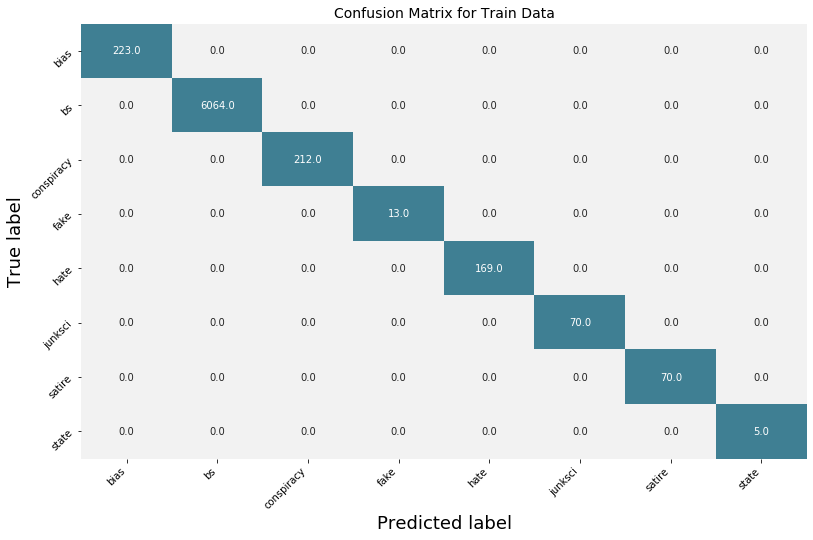

In [187]:
plotCM( confusion_matrix( ytr, ptr ), 'Train Data' )

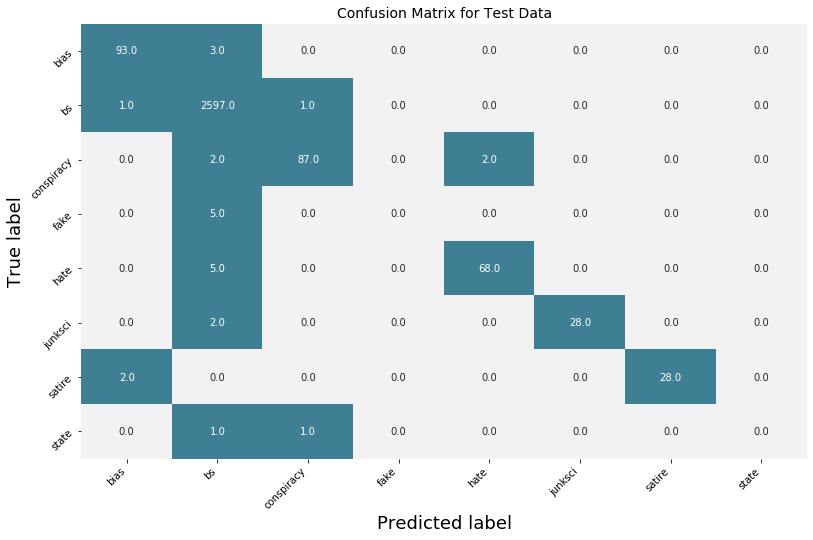

In [188]:
plotCM( confusion_matrix( yte, pte ), 'Test Data' )

### Ensemble - Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

tuned_parameters = [{'max_depth':[5, 10, 15, 30, 50], 'max_features': ['auto', 'sqrt'], 'n_estimators': [200, 400] }]


rf = GridSearchCV( RandomForestClassifier(), tuned_parameters, cv=15, scoring= scorer, n_jobs = -1)
rf.fit(xtr1, ytr)

print("Best parameters :",rf.best_params_)
print("\nGrid scores :")
print()

means = rf.cv_results_['mean_test_score']
stds = rf.cv_results_['std_test_score']

for mean, std, params in zip( means, stds, rf.cv_results_['params'] ):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)


Best parameters : {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 400}

Grid scores :

0.836 (+/-0.003) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.836 (+/-0.003) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 400}
0.836 (+/-0.003) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
0.836 (+/-0.003) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 400}
0.838 (+/-0.006) for {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
0.838 (+/-0.006) for {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 400}
0.838 (+/-0.006) for {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
0.839 (+/-0.006) for {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 400}
0.874 (+/-0.023) for {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 200}
0.871 (+/-0.015) for {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 400}
0.873 (+/-0.033) for {'max_depth': 15, 'max_features': 'sqrt', 'n_e

In [195]:
# Finalising the model and checking on Test Data

model = RandomForestClassifier( max_depth= 50, max_features= 'auto', n_estimators= 400 )
model.fit(xtr1, ytr)

pte = model.predict( xte1 ) 
ptr = model.predict( xtr1 ) 

# print classification report 
print('Train Classification Report :-\n',classification_report( ytr, ptr ) ) 
print('\n\nTest Classification Report :-\n',classification_report( yte, pte ) ) 

Train Classification Report :-
               precision    recall  f1-score   support

        bias       1.00      1.00      1.00       223
          bs       1.00      1.00      1.00      6064
  conspiracy       1.00      1.00      1.00       212
        fake       1.00      0.85      0.92        13
        hate       1.00      0.99      1.00       169
     junksci       1.00      1.00      1.00        70
      satire       1.00      1.00      1.00        70
       state       1.00      1.00      1.00         5

    accuracy                           1.00      6826
   macro avg       1.00      0.98      0.99      6826
weighted avg       1.00      1.00      1.00      6826



Test Classification Report :-
               precision    recall  f1-score   support

        bias       1.00      0.96      0.98        96
          bs       0.99      1.00      1.00      2599
  conspiracy       0.99      0.98      0.98        91
        fake       0.00      0.00      0.00         5
        hate 

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


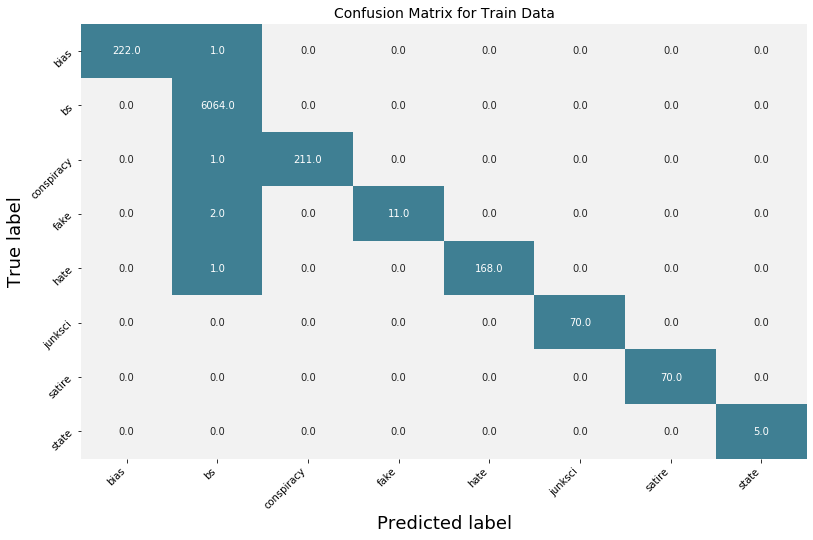

In [197]:
plotCM( confusion_matrix( ytr, ptr ), 'Train Data' )

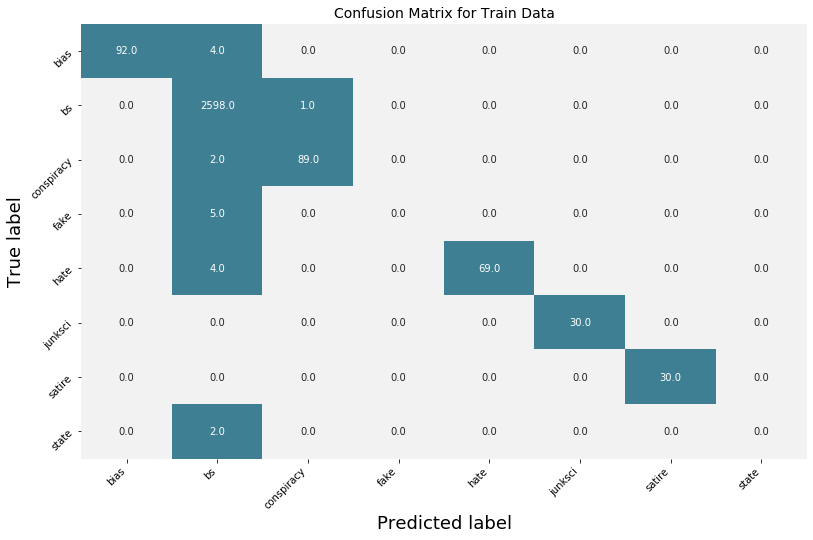

In [198]:
plotCM( confusion_matrix( yte, pte ), 'Train Data' )